# REGRESSION (Training Models)

### Linear Regression 
Two ways to train a linear regression model:
- Direct 'Closed-form' equation  <br/>

Direct computation of model parameter that best fits the model. 
    
- Using iterative optimization approach (Gradient Descent)  <br/>

Gradual tweaking of model parameter to minimize the cost function over training dataset. We will conbverge to same set of parameters as first method


<b>General Linear Regression equation<br/></b>
$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$<br/>
    Where, $\hat{y}$ is predicted value.<br/>
    $x_i$ is the i<sup>th</sup> feature value.<br/>
    $\theta_j$ is j<sup>th</sup> feature weight.<br/><br/>
<b>Vectorised form of linear regression model</b><br/>
$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}
$<br/>
Where, $h_θ$ is the hypothesis function, using the model parameters θ.<br/>
θ is the model’s parameter vector, containing the bias term $θ_0$ and the feature weights $θ_1$ to $θ_n$.<br/>
$θ_T$ is the transpose of θ (a row vector instead of a column vector).<br/><br/>
<b>Performance measure for a Regression model (Cost Function)</b><br/>
- Root mean Square Error (RMSE) is most commonly used in Regression models.
- Although <b>it is simpler to minimize the Mean Square Error (MSE) rather than RMSE</b> and it will lead to same result.<br/><br/>
$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$<br/>
Where, y<sup>(i)</sup> is actual value.

### The Normal Equation
Closed form solution.<br/><br/>
$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
$<br/>
Where, $\hat{θ}$ is the value of θ that minimizes the cost function.<br/>
y is the vector of target values containing y<sup>(1)</sup> to y<sup>(m)</sup>.

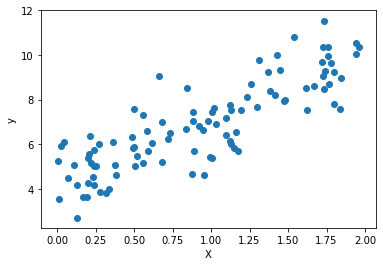

In [1]:
# Generate linear sample data
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1) # 100 rows, 1 column
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [2]:
from numpy import linalg as la
# we will compute 𝜽(hat) using Normal Equation.
# for calculating the bias, we need to add x0 = 1 to each instance
# i.e. 𝜽(0)*1 + 𝜽(1)*x = y
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # 𝜽(0), 𝜽(1)...𝜽(n) where n is number of features

array([[4.24856107],
       [2.84252086]])

In [3]:
# Prediction using obtained 𝜽
# lets predict for x = 0 and x = 2
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.24856107],
       [9.93360279]])

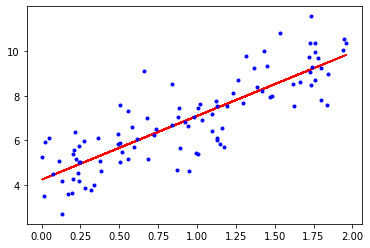

In [4]:
# Plot of prediction for training data
y_predict = X_b.dot(theta_best)
plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [5]:
# Equivalent Scikit-Learn code
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Bias = {} and coeficients are {}'.format(lin_reg.intercept_, lin_reg.coef_))
lin_reg.predict(X_new)

Bias = [4.24856107] and coeficients are [[2.84252086]]


array([[4.24856107],
       [9.93360279]])

Reason we dont use Closed-equation is its complexity.
- Computational complexity of inverse of an nxn matrix is about O(n^2.4) to O(n^3).
- If feature increase then computation time increases exponentially.
- However, it has linear O(m) comutational complexity wrt number of instances.
- It will perform well as long as the instances fit the memory and features are less.<br/><br/>
We will look at a different way to train the linear regression model, which is more suitable for cases where there is large number of features and too many training instances to fit in memory.

### Gradient Descent

Tweak parameter iteratively in order to minimize a cost function.<br/>
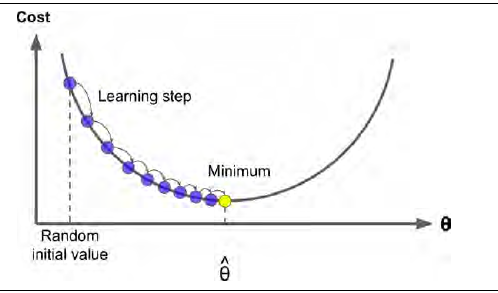
<b>Learning Rate</b> - Size of learning step while approaching the minima.
- Small Learning rate - Algorithm will have to go through many iterations to converge.
- Large Learning Rate - We will keep missing the minima, diverging more everytime.<br/>

<b>Challenges of Gradient Descent</b>
- Local minimum
- Plateau - plain surface with slope slightly deviating from 0, which takes very much time to cross.

Fortunately, cost function <b>MSE</b> has following properties which help.
- It is a convex function for a linear regression model, i.e., no local minima.
- It is a continuous function with slope that never change abruptly.

<b>Why feature scaling is important?</b>
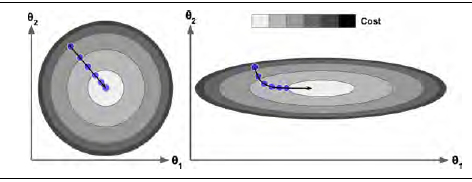
- left image has both the features on same scale.
- right image, feature 1 has much smaller values than feature 2, thus it is elongated along $θ_1$ axis.

Dimention of space will increase as the feature increase and it will be harder to find the minima.

### Batch Gradient Descent

Change in each individual feature weight ($θ_j$) will lead to change in overall MSE.
<b>Partial derivatives of the cost function</b>
$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$<br/><br/>
We can calculate all at once, instead of individual.<br/>
The gradient vector, noted $∇_θ$MSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).<br/>
$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \boldsymbol{\theta} - \mathbf{y})
$<br/>
- Calculations here are done over the whole batch of training set.
- Terribly slow on very large training set.
- GD scales well with features, better than Normal Equation.<br/><br/>
New $\theta$ can be decided according to the error, with the help of learning rate.
$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$

In [6]:
# Implementation of Batch - gd
lr = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients
theta

array([[4.24856107],
       [2.84252086]])

In [7]:
#Effect of lr on converging
def lr_prediction_plot(X, y, epoch, m, lr):
    X_b = np.c_[np.ones((100, 1)), X]
    
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(epoch):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients
        y_predict = X_b.dot(theta)
        plt.plot(X, y_predict, "r-")
    
    plt.plot(X, y, "b.")
    plt.show()

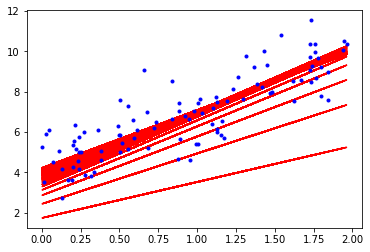

In [8]:
# perfect learning rate
lr_prediction_plot(X, y, 100, 100, 0.1)

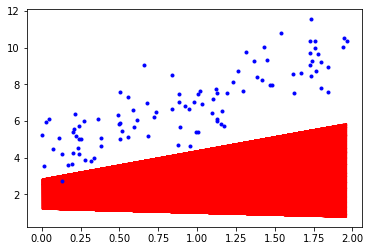

In [9]:
# low learning rate
lr_prediction_plot(X, y, 100, 100, 0.002)

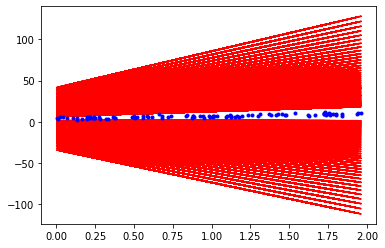

In [10]:
# High learning rate
lr_prediction_plot(X, y, 100, 100, 0.5)

How to set proper learning rate?
- Use Grid search

How to limit number of itterations?
- Too low -> far away from solution, too high -> waste of time
- Early stopping
    - Set a high number of itteration.
    - Break the itteration when gradient vector becomes tiny, i.e., its norm becomes smaller than a tiny number $\epsilon$(tolerance).<br/><br/>

<b>Convergence Rate</b> - Rate at which the cost function converges.
- For convex cost function like MSE -> Convergence Rate = $\text{O}(\dfrac{1}{iterations})$
- i.e for converging to a $\epsilon$ 10 times smaller, we have to run 10 times more iterations.

### Stochastic Gradient Descent
- Picks random instances for training at each step, rather than picking whole dataset. (much faster)
- Less regular than GD due to random data, cost function doesn't decrease gently.
- It never settle down at minima, at end parameter value are good but not optimal.
- Due to its unsettling nature, <b>SGD escapes local minima</b>.
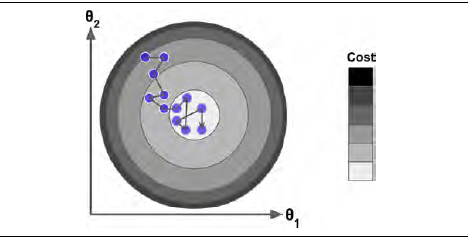

#### Learning Schedule and Simulated Annealing
<b>Simulated Annealing</b> - Gradually reducing the learning rate.
- Start large, quick progress and escape local minima.
- Get smaller, allow to settle at global minima.

<b>Learning Schedule</b> - Function that determines the learning rate at each iteration(epoch). 

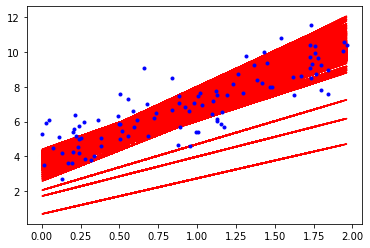

array([[4.23315711],
       [2.8877536 ]])

In [11]:
# Implementation of SGD with simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        #plotting predictions for first 10 epochs.
        if epoch<10:
            y_predict = X_b.dot(theta)
            plt.plot(X, y_predict, "r-")

plt.plot(X, y, "b.")
plt.show()
# By convention, In each epoch m number of random instance is chosen.
# m = number of total instances.
# lr and theta are updated for m times in each epoch 
# We get satisfactory result by 50 epoch in this case
theta

- Random instance is picked at each epoch.
- If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set, then go through it instance by instance, then shuffle it again, and so on.

Linear Regression using SGD with scikit-learn is performed using <b>SGDRegressor</b>
- Uses different learning schedule.
- max_iter = 50 : epochs (n_iter_no_change, default=5 : wait for 5 epochs, if it shows no change stop early)
- eta0 = 0.1 : Initial learning rate
- penalty = None : Does not use any regularization.(will be clear in future)

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.2619704]), array([2.85532195]))

### Mini - Batch Gradient Descent
- It computes the gradients on small random sets of instances called minibatches.
- If we use fairly large mini-batches, we will end up walking around a bit closer to the minimum than SGD.
- It is harder for mini-batch GD to escape local minima.

Comparison of the three methods(path taken to reach minima.
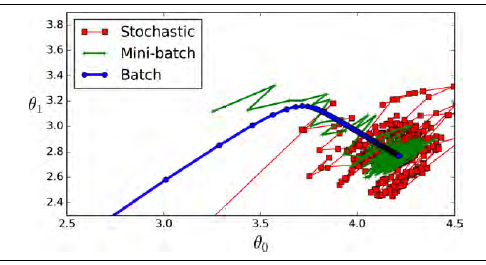
- Batch GD reaches minimum, while stochastic and mini-batch can keep walking around.
- This can be resolved using good learning rate schedule.

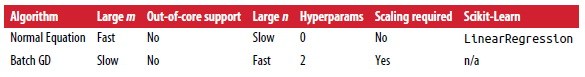
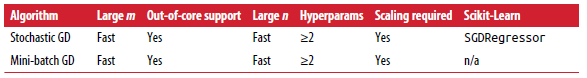

### Ploynomial Regression
- Data can be complex than a simple straight line.
- We can use linear model to fit non-linear model.
    - Add powers of each feature as new features, then train a linear model on this extended set of features.

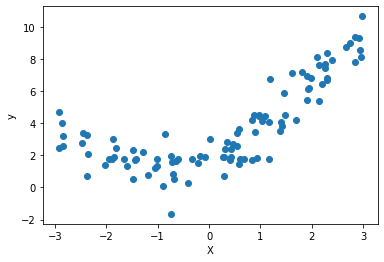

In [13]:
# Generate non-linear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [14]:
# Adding square of each feature to the training set as new feature.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], 'After adding polynomial feature', X_poly[0])

# Use linear Regressor on extended dataset.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('bias -', lin_reg.intercept_, 'weights -', lin_reg.coef_)

[1.0880322] After adding polynomial feature [1.0880322  1.18381407]
bias - [1.91061813] weights - [[1.07012417 0.5427068 ]]


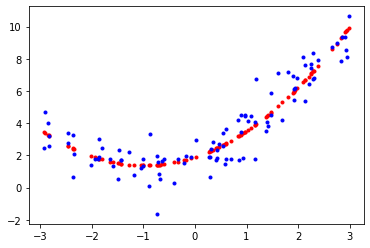

In [15]:
# plotting the prediction
y_predict = lin_reg.predict(X_poly)
plt.plot(X, y_predict, "r.")
plt.plot(X, y, "b.")
plt.show()

<b>PolynomialFeatures explosion of number of features</b>
- degree = 3, will give $a^3$,$b^3$, $a^2$, $b^2$, and will also give $a^2b$, $ab^2$, $ab$.
- PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\dfrac{(n + d)!}{d!n!}$features.

### Learning Curves
- In the previous data we were using quadratic model.
- Using a 300-degree polynomial model will give us <b>Overfitting</b> model, while using a linear model will give us <b>Underfitting</b> model.

<b>How to decide how complex a model should be to not overfit or underfit?</b>
1. Use cross-validation.
2. Look at <b>learning curves</b> - Plot of model's performance on training set and validation set as a <b>fuction of training set size.</b>

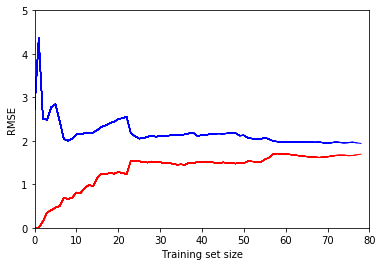

In [16]:
# Plotting learning curve for linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-", linewidth=1)
        plt.plot(np.sqrt(val_errors), "b-", linewidth=1)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.xlim(0, 80)
    plt.ylim(0, 5)
    plt.show()
        
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

<b>Underfitting</b>
- These learning curve are typical of an underfitting model. Both curves have reched the plateau, they are close and fairly high.
- When model is underfitting the training data, adding more training instances will not help. <b>We need to use a more complex model.</b>

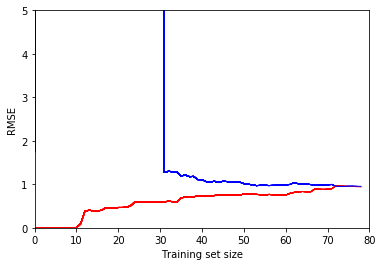

In [17]:
from sklearn.pipeline import Pipeline
# Make a pipeline for adding features and for fitting model
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

<b>Overfitting</b>
- The error on the training data is much lower than with the Linear model.
- Gap between both lines : model performes well on training data. However, if you used a much larger training set, the two curves would continue to get closer.
- <b>Use more training data</b> to improve overfitting model, so that validation error reaches training error.

#### Bias/Variance Tradeoff
Model’s generalization error can be expressed as the sum of three very different errors:<br/><br/>
<u>Bias</u>
- Assuming that data is linear when it is actually quadratic.
- A high-bias model is most likely to underfit the training data.

<u>Variance</u>
- Model excessive sensetive to small variations in training data. (High degree polynomial model)
- A high-variance model is most likely to overfit the training data.

<u>Irreducible error</u>
- Due to noiseness of the data.
- Only way to reduce this part is by data cleaning.

<b>Increasing model's complexity</b> increases variance and reduces bias.<br/>
<b>Decreasing model's complexity</b> increases bias and reduces variance.

### Regularized Linear Models
- We regularize a model to reduce overfitting.
- eg.  simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For linear model, regularization is typically achieved by constraining the weights of the model. Three ways to constraint weights:
1.  Ridge Regression
2. Lasso Regression
3. Elastic Net

### Ridge Regression (Tikhonov regularization) 
A term is added to cost function <b>while training</b>.<br/>
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$<br/>
Both error and weights decide the new error, which regularizes the weights.<br/>

<u>Using different cost function for training and testing</u>
- While regulariztion.
- Also, A good training cost function should have optimization friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. 
- eg. Classifier trained using log loss, and evaluated using precision/recall.<br/>

Bias term $\theta_0$ is not regularized, only feature weights are regularized.<br/><br/>
It is important to scale the data using StandardScaler, before using Ridge Regression as it is sensitive to scale of input.<br/><br/>
Ridge Regression can be implemented same as linear regression using <b>Closed Form Equation</b> and <b>Gradient Descent</b>, Closed for equation is given below.<br/>
$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$<br/>
A is n x n identity matrix, but it has a 0 on top-left cell, corresponding to the bias term.

In [18]:
# Implementation of closed form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10, solver="cholesky")
ridge_reg.fit(X_poly, y)
ridge_reg.predict([[1.5, 2.25]])

array([[4.69497166]])

In [19]:
# Implementation of SGD
sgd_reg = SGDRegressor(penalty="l2")
# We want SGD to add a regularization term to the cost function equal to have the square of the l2 norm of weight vector.
# Which is simply Ridge Regression.
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.predict([[1.5, 2.25]])

array([4.66708857])

Vector Norms
- The L1 norm that is calculated as the sum of the absolute values of the vector.
- The L2 norm that is calculated as the square root of the sum of the squared vector values.
- The max norm that is calculated as the maximum vector values.

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression
- Uses l1 norm of weight vector instead of half the square of l2 norm.

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$
- An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).
- In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly, y)
lasso_reg.predict([[1.5, 2.25]])

array([4.38474252])

In [21]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X_poly, y.ravel())
sgd_reg.predict([[1.5, 2.25]])

array([4.64344042])

### Elastic Net
Mix between Ridge and Lasso Regression.
- r=0 > Ridge, r=1 > Lasso<br/>

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$
- It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression, Ridge is a good default.
- If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net.
- In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. 

In [22]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# l1_ratio corresponds to the mix ratio r
elastic_net.fit(X_poly, y)
elastic_net.predict([[1.5, 2.25]])

array([4.69828228])

### Early Stopping
- A way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the <b>validation error</b> reaches a minimum.
- After a certain point data start to overfit on training data, i.e. RMSE on validation set will start increasing after hitting a certain minimum, at which point training should stop.
- With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [23]:
from sklearn.model_selection import train_test_split
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [24]:
# Basic implementation of early stopping
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.base import clone
@ignore_warnings(category=ConvergenceWarning)
def manual_earlystop():
    sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                           learning_rate="constant", eta0=0.0005)
    # warm_start - continue training from where it left off.
    # max_iter - epochs
    # learning_rate - learning rate schedule(invscaling default)
    #               - constant : eta = eta0
    #               - optimal : eta = 1.0 / (alpha * (t + t0)) 
    #               - invscaling : eta = eta0 / pow(t, power_t) power_t is onother parameter
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    for epoch in range(1000):
        sgd_reg.fit(X_train_poly, y_train.ravel()) # continues where it left off
        y_val_predict = sgd_reg.predict(X_val_poly)
        val_error = mean_squared_error(y_val_predict, y_val)
        if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)
    print(best_epoch)
    return best_model
manual_earlystop()

c:\users\vivek\.conda\envs\machine_learning\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


128


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [25]:
# But now implementation of early stopping is easier
# parameters mentioned below are for sgdregression
# early_stopping - bool, default=False
#                - it will automatically set aside a fraction of training data as validation 
#                - terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.
# validation_fraction : float, default=0.1
# n_iter_no_change : int, default=5
# tol - float, default=1e-3
#     - the iterations will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.
# learning_rate - adaptive - eta = eta0, as long as the training keeps decreasing.
#                          - Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol.
#                          - if early_stopping is True, the current learning rate is divided by 5.
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, learning_rate="adaptive", eta0=0.0005, early_stopping = True)
sgd_reg.fit(X_poly, y.ravel())
print('Training stopped after',sgd_reg.n_iter_,'iterations.')

Training stopped after 157 iterations.


### Logistic Regression
- Logit Regression, binary classifier which classifies according to the probability. <br/>
$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \cdot \mathbf{x})
$ <br/>
- $\sigma()$ is known as sigmoid function, which gives output between 0 and 1. 
$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$<br/>
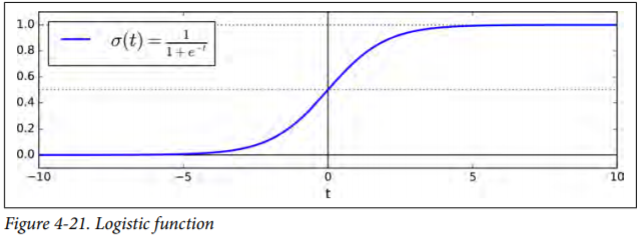<br/>
$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$<br/>
-  σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0.
-  Logistic Regression model predicts 1 if $\boldsymbol{\theta}^T\cdot\mathbf{x}$ is positive, and 0 if it is negative. <br/>



#### Cost Function
- log(1) = 0 and log(0) = $-\infty$ <br/>

we can write the cost function for single instance as :<br/>
$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$ <br/>
- i.e when actual is 1 cost function will reach to $\infty$ if predicted value is going near 0 and similarily vice-versa.

The cost function over the whole training set is simply the average cost over all training instances. It is also known as log loss.
$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


#### Training
- There is no closed-form equation to compute value of $\theta$.
- But  cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum.<br/>

The partial derivatives of the cost function with regards to the jth model parameter θj is given by :<br/>
$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$<br/><br/>
#### Decision Boundaries

In [26]:
# Iris Dataset
from sklearn import datasets
iris = datasets.load_iris()
# build a classifier to detect the Iris-Virginica type based only on the petal width feature.
type(iris)

sklearn.utils.Bunch

In [27]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
print('Features -', iris['feature_names'])
print('target names - ', iris['target_names'])
iris['data'][:5]

Features - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names -  ['setosa' 'versicolor' 'virginica']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [29]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

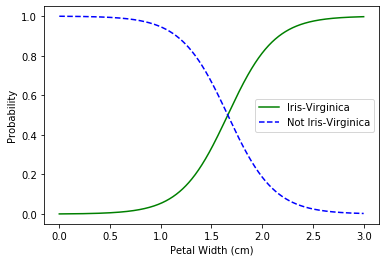

array([1, 0])

In [31]:
# model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.show()
log_reg.predict([[1.7], [1.5]])

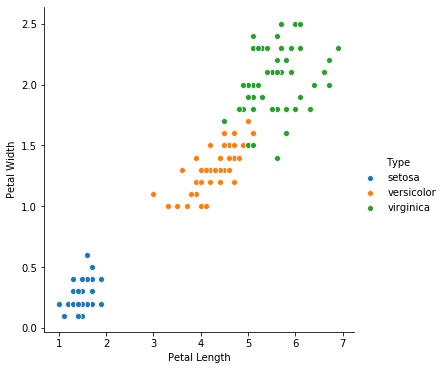

In [32]:
import seaborn as sns
import pandas as pd
labels = ['setosa','versicolor','virginica']
df = pd.DataFrame({'x':iris['data'][:,2:3].ravel(),'y':iris['data'][:,3:].ravel(),'Type':[labels[i] for i in iris['target']]})
plot = sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Type', height = 5)
plot.set(xlabel='Petal Length', ylabel='Petal Width')

- Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties.
- Scitkit-Learn actually adds an ℓ2 penalty by default.
- The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C.
- The higher the value of C, the less the model is regularized.


### Softmax Regression
- Softmax Regression, or Multinomial Logistic Regression.
- Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.
- Softmax score for class k is given as below:<br/>
$
s_k(\mathbf{x}) = {\boldsymbol{\theta}_k}^T \cdot\mathbf{x}
$<br/>
- each class has its own dedicated parameter vector $θ_k$.
- After getting softmax score we can attain probability for a class by <b>softmax function</b>:<br/>
$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$<br/>
<b>Prediction</b><br/>
$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$<br/>
- The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) 

#### Cost Function
- Cross Entropy
- penalizes the model when it estimates a low probability for a target class.<br/>
$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$<br/>
- $y_k^i$ is equal to 1 if the target class for the ith instance is k; otherwise, it is equal to 0.
- Note -  At K = 2, this cost function is equivalent to the Logistic Regression’s cost function (log loss).<br/>
<br/>
- Derivative of cost function<br/>
$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$<br/>
- use Gradient Descent (or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

In [33]:
# ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes
# We can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead
# Also specify a solver that supports Softmax Regression, such as the "lbfgs" solver
# "lbfgs" solver applies ℓ2 regularization by default, which you can control using the hyperparameter C.
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(labels[softmax_reg.predict([[5, 2]])[0]])
softmax_reg.predict_proba([[5, 2]])

virginica


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

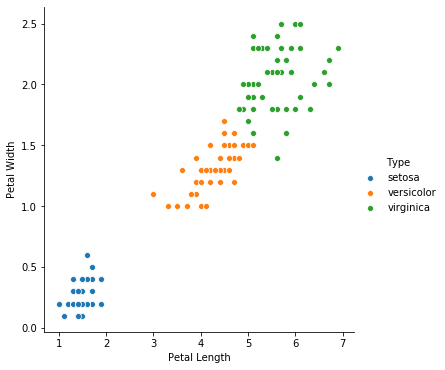

In [35]:
y_pred = [labels[i] for i in softmax_reg.predict(X)]
df = pd.DataFrame({'x':iris['data'][:,2:3].ravel(),'y':iris['data'][:,3:].ravel(),'Type':y_pred})
plot = sns.pairplot(x_vars='x', y_vars='y', data=df, hue='Type', height = 5)
plot.set(xlabel='Petal Length', ylabel='Petal Width')